<img src='11.jpeg'>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset_v2.json
/kaggle/input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset.json


# Makine Öğrenimi ile İğneleme Tespiti

In [2]:
import matplotlib.pyplot as plt
import emoji
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator

In [3]:
df=pd.read_json("/kaggle/input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset_v2.json",lines=True)

In [4]:
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB


In [7]:
df.isnull().sum()

is_sarcastic    0
headline        0
article_link    0
dtype: int64

In [10]:
df.drop(columns=['article_link'],inplace=True)

In [11]:
df.head()

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression #classification algoritmasi
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer

In [13]:
df['headline']=df['headline'].str.lower() #kucuk harfe cevir'
df['headline']=df['headline'].str.replace('[^\w\s]','') #noktalama isaretlerini kaldir 
df['headline']=df['headline'].str.replace('\d+','') # rakamlari yoket
df['headline']=df['headline'].str.replace('\n','').replace('\r','') # yeni satir ve entera basilan yerleri kaldirdik

In [14]:
df["is_sarcastic"].value_counts()

is_sarcastic
0    14985
1    13634
Name: count, dtype: int64

In [15]:
def wc(data,bgcolor):    
    plt.figure(figsize=(10,10))
    wc=WordCloud(background_color=bgcolor)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

In [16]:
# 1 ve 0 gibi ikili değerleri içerir;  1 alaycı  ,  0 alaycı değil anlamına gelir

In [24]:
spam=df.query('is_sarcastic==1')['headline'] #iğneleme alaycı mesajları spam değişkenine atadık
ham=df.query('is_sarcastic==0')['headline']

#normal mesjları ham değişkenine atadık

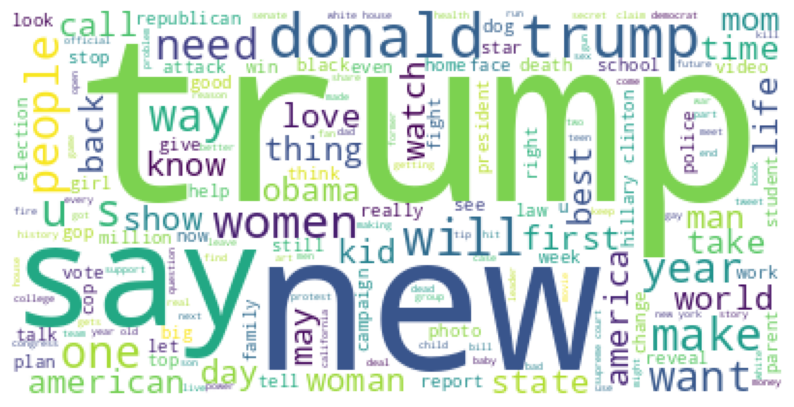

In [25]:
wc(ham,'white')

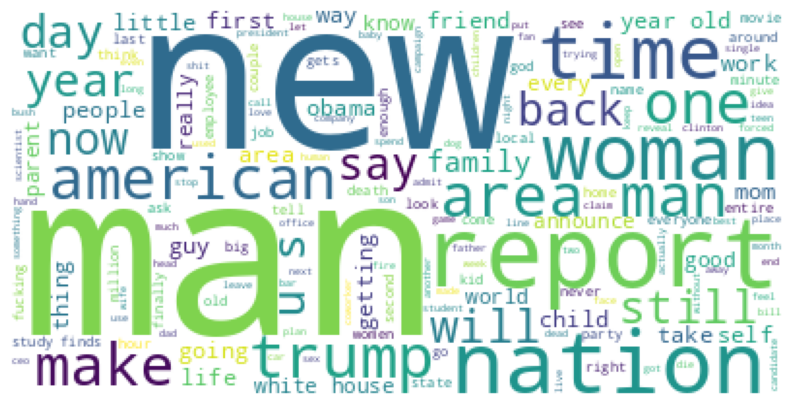

In [26]:
wc(spam,'white')

In [27]:
x=df["headline"]
y=df["is_sarcastic"]

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

#vektöre çeviren paket

In [29]:
vect=CountVectorizer(stop_words='english')

#stop_words='english' gereksiz kelmeleri kaldır

In [30]:
x=vect.fit_transform(x)

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)

In [33]:
tf=pd.DataFrame(x_train.toarray(),columns=vect.get_feature_names_out())

In [34]:
nb=MultinomialNB()

In [35]:
model=nb.fit(x_train,y_train)

In [36]:
pred=nb.predict(x_test)

In [37]:
accuracy_score(pred,y_test)

0.8093990216631726

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.stem.porter import PorterStemmer

from sklearn.svm import SVC
s=SVC()

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

In [39]:
vect=CountVectorizer(stop_words='english')

#stop_words='english' gereksiz kelmeleri kaldır

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)

In [42]:
model=s.fit(x_train,y_train)

In [45]:
tahmin=model.predict(x_test)

In [46]:
accuracy_score(tahmin,y_test)
#yeni gelen mesajların alaycı mı normal mi  olduğunu tahmin etme oranı

0.8032844164919637

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
cv = CountVectorizer()


In [7]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

Enter a Text: hello


NotFittedError: Vocabulary not fitted or provided